In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import joblib

In [15]:
# 2. Load Dataset
df = pd.read_excel('data_inflasi.xlsx')
df.head()

,no,tanggal,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15


In [16]:
# 3. Preprocessing
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('no', inplace=True)
df.dtypes

tanggal                        datetime64[ns]
Data Inflasi (dalam persen)           float64
dtype: object

In [17]:
# 4. Feature Engineering
df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month
df.head()

,tanggal,Data Inflasi (dalam persen),year,month
no,,,,
1,2003-01-01,8.68,2003,1
2,2003-02-01,7.60,2003,2
3,2003-03-01,7.17,2003,3
4,2003-04-01,7.62,2003,4
5,2003-05-01,7.15,2003,5


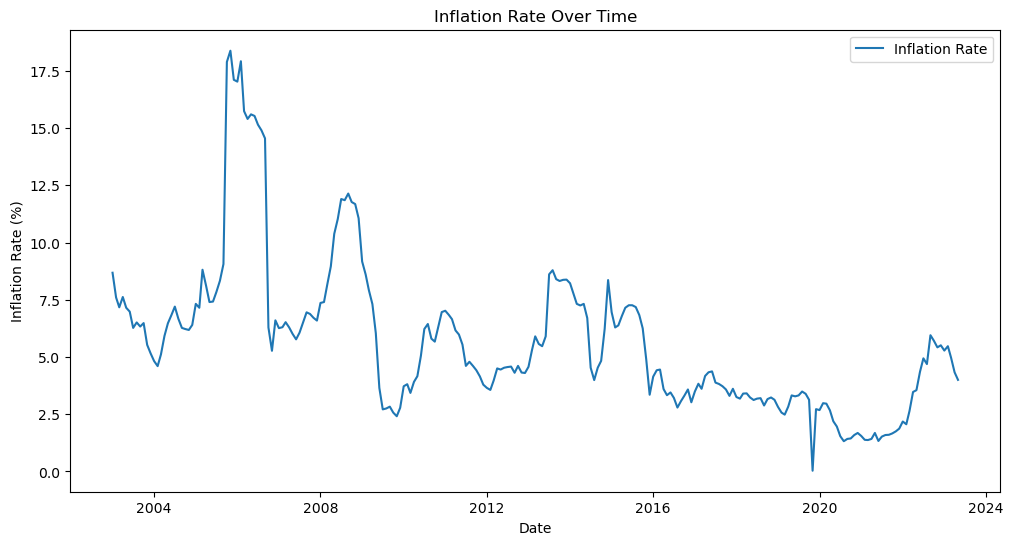

In [18]:
# 5. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(df['tanggal'], df['Data Inflasi (dalam persen)'], label='Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Over Time')
plt.legend()
plt.show()

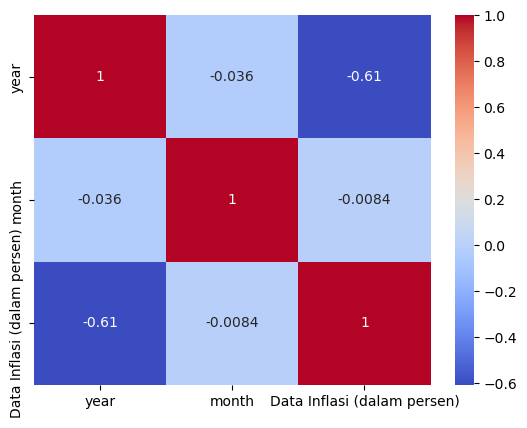

In [19]:
correlation = df[['year', 'month', 'Data Inflasi (dalam persen)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [20]:
# 6. Train-Test Split
X = df[['year', 'month']]
y = df['Data Inflasi (dalam persen)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# 7. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MAE: 1.7824237286037348
MSE: 6.521937163342014
RMSE: 2.5538083646472014
R²: 0.380264728781014


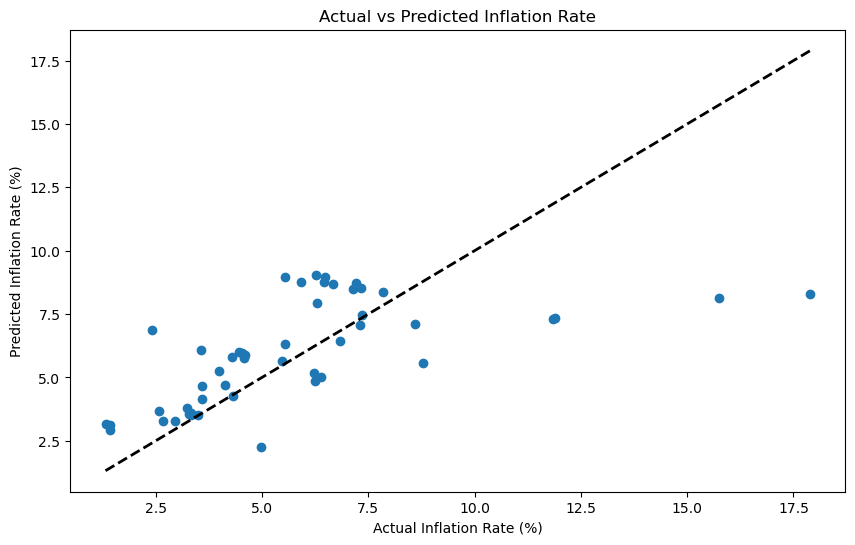

In [22]:
# 8. Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Inflation Rate (%)')
plt.ylabel('Predicted Inflation Rate (%)')
plt.title('Actual vs Predicted Inflation Rate')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


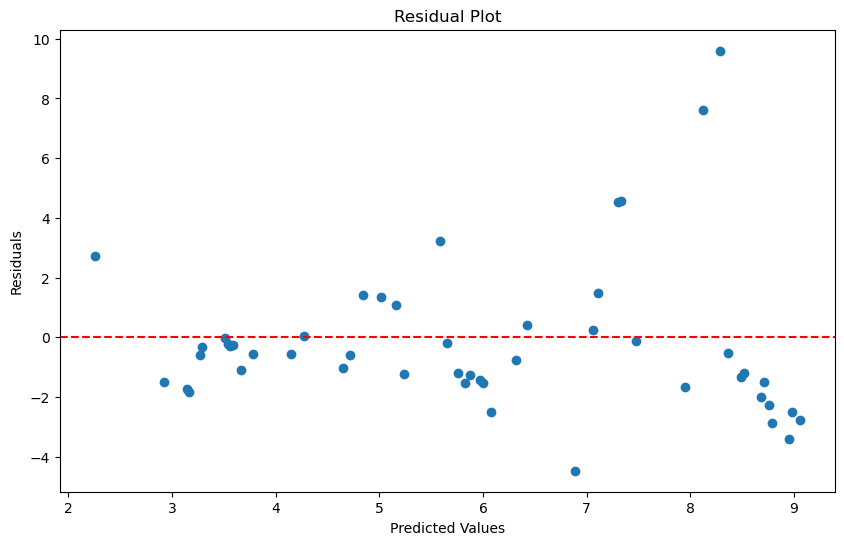

In [23]:
# 9. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

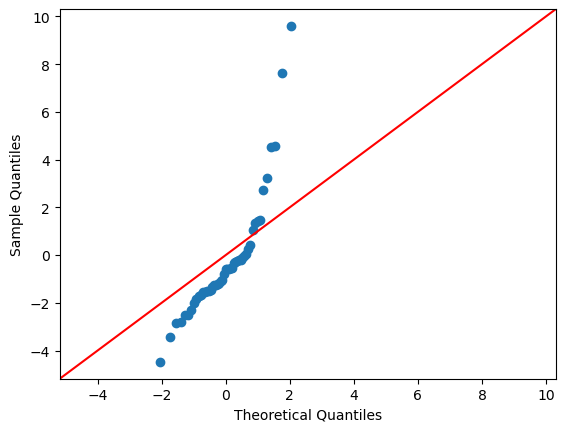

In [24]:
sm.qqplot(residuals, line='45')
plt.show()

In [25]:
# 10. Save the Model
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [27]:
import pandas as pd
import joblib

# 1. Load the trained model
model = joblib.load('linear_regression_model.pkl')

# 2. Define the input year and month for prediction
input_year = 2003
input_month = 6

# Create a DataFrame for the input
input_data = pd.DataFrame({'year': [input_year], 'month': [input_month]})

# 3. Make prediction
predicted_inflation = model.predict(input_data)

# Print the result
print(f"Predicted Inflation Rate for {input_month}/{input_year}: {predicted_inflation[0]:.2f}%")


Predicted Inflation Rate for 6/2003: 9.08%
